In [56]:
# Import modules
import matplotlib.pyplot as plt                                             
import matplotlib as mpl                                                    
import cmcrameri.cm as cmc                                                  
import cartopy.feature as cf                                                
import cartopy.crs as ccrs                                                  
import configparser                                                         
from pathlib import Path                                                    
import psyplot.project as psy                                               
import argparse                                                             
import sys                                                                  
import six 

In [58]:
# Read in grid information (only if nc file is missing the information!)                          

# Function for encoding
def add_encoding(obj):                                                      
    obj.encoding['coordinates'] = 'clat clon' 

grid_ds = psy.open_dataset('../data/ICON-1E_DOM01.nc')                               
icon_ds = psy.open_dataset('../data/lfff01000000.nc').squeeze()               
ds = icon_ds.rename({"ncells":"cell"}).merge(grid_ds)               
for k, v in six.iteritems(ds.data_vars):                            
    add_encoding(v) 

In [59]:
# Read in input file (if grid information is not missing)
ds = psy.open_dataset('../data/my_exp1_atm_3d_ml_20180921T000000Z.nc') 

In [70]:
# psyplot settings
psy.rcParams["plotter.maps.xgrid"] = False                              
psy.rcParams["plotter.maps.ygrid"] = False                              
psy.rcParams["plotter.plot2d.cmap"] = cmc.nuuk  # 'cividis'             
mpl.rcParams['figure.figsize'] = [6., 6.] 

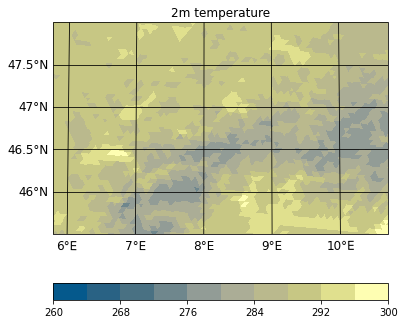

In [73]:
# create psyplot instance
# name: name of variable
# projection: e.g. robin
# bounds: Define min and max of colorbar
# map_extent: borders of map (example for Switzerland)
lonmin = 5.8
lonmax = 10.7
latmin = 45.5
latmax = 48.0
# title: title of plot
# xgrid/ygrid: Add grids
pp = psy.plot.mapplot(ds,                                                   
    name = 't_2m',                                                        
    t = 0,                                                                 
    projection = 'robin',                                                
    bounds = {'method': 'minmax', 'vmin':260, 'vmax':300},
    map_extent = [lonmin, lonmax, latmin, latmax],                          
    title = '2m temperature',
    xgrid = True,                                                       
    ygrid = True) 

# save figure                                                                                                                                                                                     
output_file = 'mapplot_example'                                                                                                                                  
plt.savefig(output_file) 

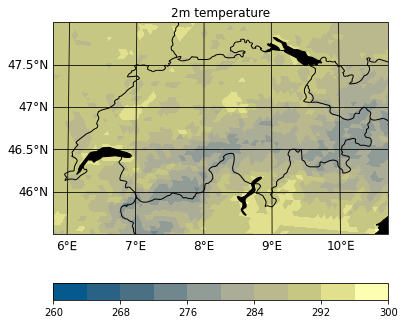

In [75]:
# Add borders and lakes with cartopy
pp = psy.plot.mapplot(ds,                                                   
    name = 't_2m',                                                        
    t = 0,                                                                 
    projection = 'robin',                                                
    bounds = {'method': 'minmax', 'vmin':260, 'vmax':300},
    map_extent = [lonmin, lonmax, latmin, latmax],                          
    title = '2m temperature',
    xgrid = True,                                                       
    ygrid = True) 

ax = pp.plotters[0].ax
resol = '10m'                                                                  
lakes = cf.NaturalEarthFeature(category='physical', name='lakes', scale=resol, edgecolor='k', facecolor='k')                                                          
ax.add_feature(cf.BORDERS)                                                     
ax.add_feature(lakes)

# save figure                                                                                                                                                                                     
output_file = 'mapplot_example'                                                                                                                                  
plt.savefig(output_file) 

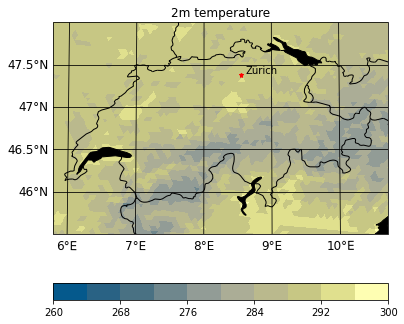

In [76]:
# Add coordinates (e.g. Zürich)
lon = 8.54
lat = 47.38
llon = lonmax-lonmin
llat = latmax-latmin
pos_lon = (lon-lonmin)/llon
pos_lat = (lat-latmin)/llat

pp = psy.plot.mapplot(ds,                                                   
    name = 't_2m',                                                        
    t = 0,                                                                 
    projection = 'robin',                                                
    bounds = {'method': 'minmax', 'vmin':260, 'vmax':300},
    map_extent = [lonmin, lonmax, latmin, latmax],                          
    title = '2m temperature',
    xgrid = True,                                                       
    ygrid = True) 

# Add borders and lakes with cartopy
ax = pp.plotters[0].ax
resol = '10m'                                                                  
lakes = cf.NaturalEarthFeature(category='physical', name='lakes', scale=resol, edgecolor='k', facecolor='k')                                                          
ax.add_feature(cf.BORDERS)                                                     
ax.add_feature(lakes)

# go to matplotlib level for adding coordinate                                                                                                    
fig = plt.gcf()
fig.axes[0].plot(pos_lon, pos_lat,'r',marker='*', markersize=5, transform=fig.axes[0].transAxes) 
fig.axes[0].text(pos_lon+llon*0.003, pos_lat+llat*0.003, 'Zürich', transform=fig.axes[0].transAxes)

# save figure                                                                                                                                                                                     
output_file = 'mapplot_example'                                                                                                                                  
plt.savefig(output_file) 